Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
#from matplotlib.colors import ListedColormap
#from sklearn import neighbors
#from sklearn.manifold import Isomap

Define function to fit a KNN model with neighbors 1, 3, 5, and 7. Additionally can create a bar plot if set to True

In [2]:
def knnAccuracyTest(X, y, debug=False):      # function to train 4 knn models with 1,3,5,7 neighbors
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)        # split dataset into 80% train and 20% test

    knn1 = KNeighborsRegressor(n_neighbors=1)       # creates KNN model with 1 neighbor
    knn3 = KNeighborsRegressor(n_neighbors=3)
    knn5 = KNeighborsRegressor(n_neighbors=5)
    knn7 = KNeighborsRegressor(n_neighbors=7)

    knn1.fit(X_train, y_train)          # trains KNN model
    knn3.fit(X_train, y_train)
    knn5.fit(X_train, y_train)
    knn7.fit(X_train, y_train)

    accuracy1 = knn1.score(X_train, y_train)        # test and save accuracy of trained KNN model
    accuracy3 = knn3.score(X_train, y_train)
    accuracy5 = knn5.score(X_train, y_train)
    accuracy7 = knn7.score(X_train, y_train)

    accuracies = {          # save accuracies into dictionary to be called later outside of function
        '1 Neighbor': accuracy1,
        '3 Neighbors': accuracy3,
        '5 Neighbors': accuracy5,
        '7 Neighbors': accuracy7
    }       # used a dictionary so the key is the x-axis label

    if debug == True:        # used for debugging, can return a bar plot comparing all accuracies of 4 models
        print(f'The accuracy of the KNN model with 1 Neighbor is {accuracy1:.2f}')
        print(f'The accuracy of the KNN model with 3 Neighbor is {accuracy3:.2f}')
        print(f'The accuracy of the KNN model with 5 Neighbor is {accuracy5:.2f}')
        print(f'The accuracy of the KNN model with 7 Neighbor is {accuracy7:.2f}')
        
        plt.figure(figsize=(10, 6))
        plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'cyan'])
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of KNN Models')
        plt.show()

    return accuracies

Import Dataset 1 and train KNN model to predict initial conditions using walker dimensions

In [3]:
# use dataset 1 to predict initial conditions using walker dimensions
data = pd.read_csv("dataTable.csv")
X = data[['M', 'm', 'c', 'g', 'gamma']]
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc1 = knnAccuracyTest(X, y)

# use dataset 1 to predict stability using initial conditions
X = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]
y = data[['stable']]

acc2 = knnAccuracyTest(X, y)

# use dataset 2 to predict initial conditions using walker dimensions
data = pd.read_csv('n10000 gamma0-0.2.csv')
X = data[['M', 'm', 'l', 'c', 'g', 'gamma']]
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc3 = knnAccuracyTest(X, y)

# use dataset 2 to predict stability using initial conditions
X = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]
y = data[['stable']]

acc4 = knnAccuracyTest(X, y)

Plot out metrics for the above 4 models

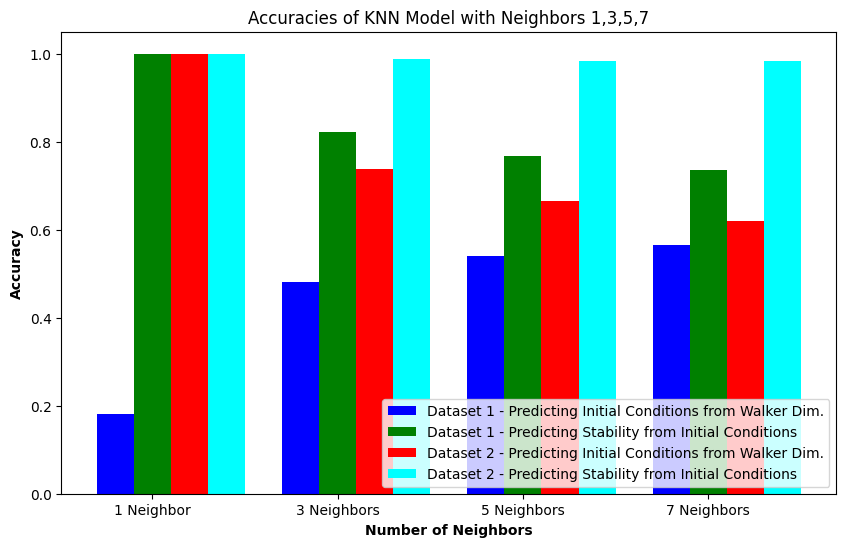

In [4]:
bar_width = 0.2
    
r1 = np.arange(len(acc1))       # figures out the spacing between x labels and bar widths
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, acc1.values(), color='blue', width=bar_width, label='Dataset 1 - Predicting Initial Conditions from Walker Dim.')
plt.bar(r2, acc2.values(), color='green', width=bar_width, label='Dataset 1 - Predicting Stability from Initial Conditions')
plt.bar(r3, acc3.values(), color='red', width=bar_width, label='Dataset 2 - Predicting Initial Conditions from Walker Dim.')
plt.bar(r4, acc4.values(), color='cyan', width=bar_width, label='Dataset 2 - Predicting Stability from Initial Conditions')

plt.xlabel('Number of Neighbors', fontweight='bold')        # bold looks better than standard
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(acc1))], list(acc1.keys()))        

plt.legend(loc='lower right')
plt.title('Accuracies of KNN Model with Neighbors 1,3,5,7')
plt.show()

Load Dataset 1, transform input data into 2 principal components, train KNN model to predict initial conditions using walker dimensions

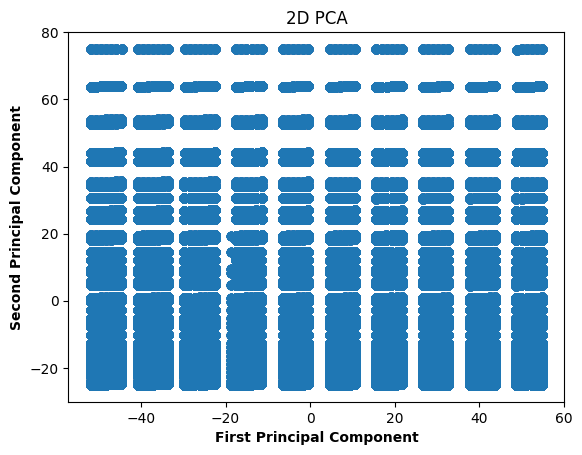

In [5]:
data = pd.read_csv("dataTable.csv")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[['M', 'm', 'c', 'g', 'gamma']])
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc5 = knnAccuracyTest(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component', fontweight='bold')
plt.ylabel('Second Principal Component', fontweight='bold')
plt.title('2D PCA')
plt.show()

Use Dataset 1, transform input data into 2 principal components, train KNN model to predict stability using initial conditions

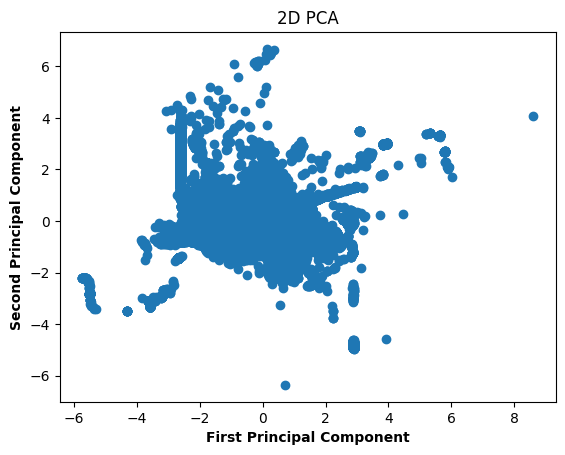

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']])
y = data[['stable']]

acc6 = knnAccuracyTest(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component', fontweight='bold')
plt.ylabel('Second Principal Component', fontweight='bold')
plt.title('2D PCA')
plt.show()

Load Dataset 2, transform input data into 2 principal components, train KNN model to predict initial conditions using walker dimensions

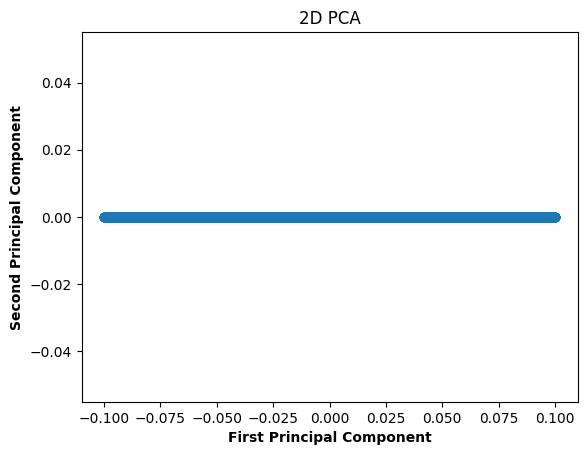

In [7]:
data = pd.read_csv("n10000 gamma0-0.2.csv")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[['M', 'm', 'l', 'c', 'g', 'gamma']])
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc9 = knnAccuracyTest(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component', fontweight='bold')
plt.ylabel('Second Principal Component', fontweight='bold')
plt.title('2D PCA')
plt.show()

Use Dataset 2, transform input data into 2 principal components, train KNN model to predict stability using initial conditions

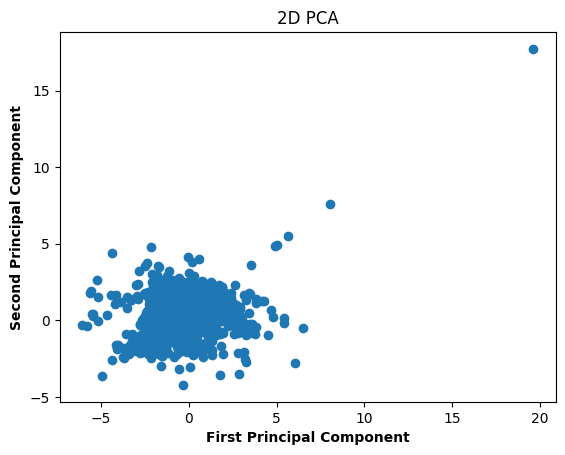

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']])
y = data[['stable']]

acc10 = knnAccuracyTest(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component', fontweight='bold')
plt.ylabel('Second Principal Component', fontweight='bold')
plt.title('2D PCA')
plt.show()

Load Dataset 1, transform input data into 3 principal components, train KNN model to predict initial conditions using walker dimensions

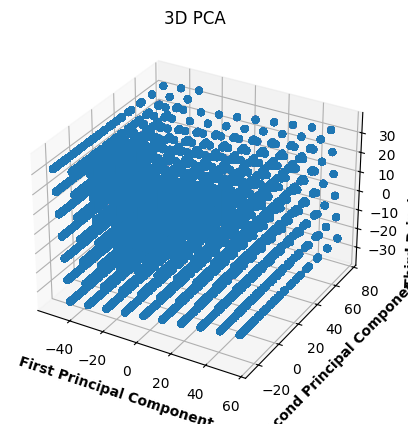

In [9]:
data = pd.read_csv("dataTable.csv")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['M', 'm', 'c', 'g', 'gamma']])
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc7 = knnAccuracyTest(X_pca, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component', fontweight='bold')
ax.set_ylabel('Second Principal Component', fontweight='bold')
ax.set_zlabel('Third Principal Component', fontweight='bold')
plt.title('3D PCA')
plt.show()

Use Dataset 1, transform input data into 3 principal components, train KNN model to predict stability using initial conditions

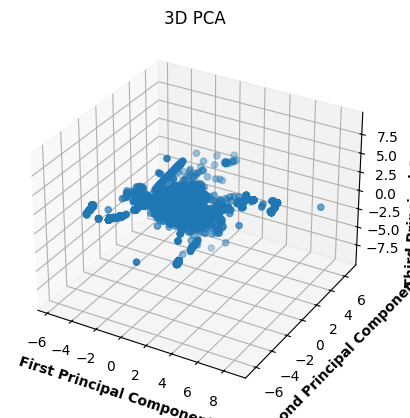

In [10]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']])
y = data[['stable']]

acc8 = knnAccuracyTest(X_pca, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component', fontweight='bold')
ax.set_ylabel('Second Principal Component', fontweight='bold')
ax.set_zlabel('Third Principal Component', fontweight='bold')
plt.title('3D PCA')
plt.show()

Load Dataset 2, transform input data into 3 principal components, train KNN model to predict initial conditions using walker dimensions

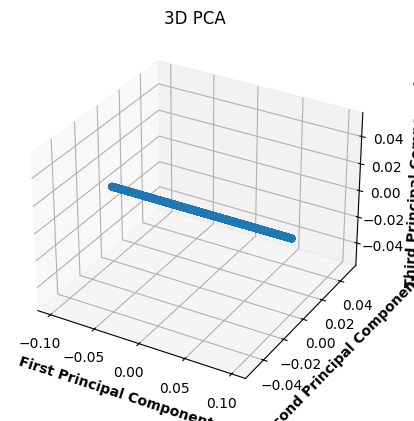

In [11]:
data = pd.read_csv("n10000 gamma0-0.2.csv")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['M', 'm', 'l', 'c', 'g', 'gamma']])
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

acc11 = knnAccuracyTest(X_pca, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component', fontweight='bold')
ax.set_ylabel('Second Principal Component', fontweight='bold')
ax.set_zlabel('Third Principal Component', fontweight='bold')
plt.title('3D PCA')
plt.show()

Use Dataset 2, transform input data into 3 principal components, train KNN model to predict stability using initial conditions

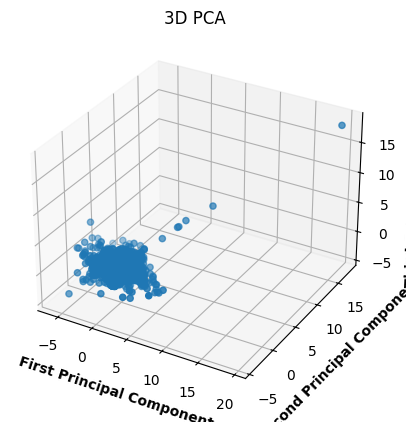

In [12]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']])
y = data[['stable']]

acc12 = knnAccuracyTest(X_pca, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component', fontweight='bold')
ax.set_ylabel('Second Principal Component', fontweight='bold')
ax.set_zlabel('Third Principal Component', fontweight='bold')
plt.title('3D PCA')
plt.show()

Plot out metrics for the above 8 models

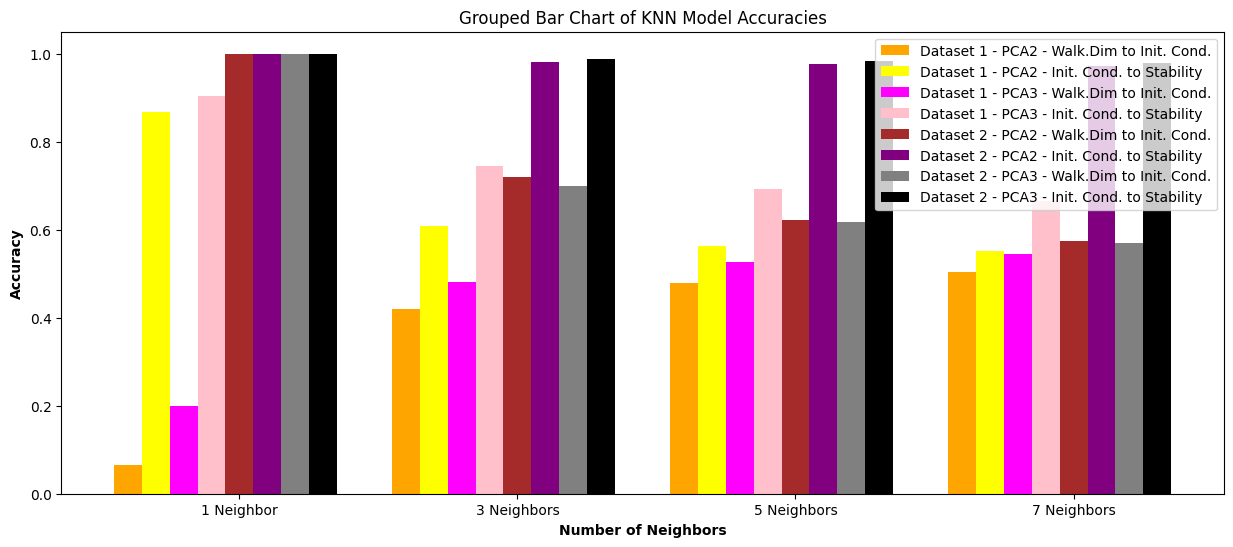

In [13]:
bar_width = 0.1         # original 0.2 is too big
    
r1 = np.arange(len(acc5))       # figures out the spacing between x labels and bar widths
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]

# note to self, python has a lot more quick color options then matlab

plt.figure(figsize=(15, 6))
plt.bar(r1, acc5.values(), color='orange', width=bar_width, label='Dataset 1 - PCA2 - Walk.Dim to Init. Cond.')
plt.bar(r2, acc6.values(), color='yellow', width=bar_width, label='Dataset 1 - PCA2 - Init. Cond. to Stability')
plt.bar(r3, acc7.values(), color='magenta', width=bar_width, label='Dataset 1 - PCA3 - Walk.Dim to Init. Cond.')
plt.bar(r4, acc8.values(), color='pink', width=bar_width, label='Dataset 1 - PCA3 - Init. Cond. to Stability')
plt.bar(r5, acc9.values(), color='brown', width=bar_width, label='Dataset 2 - PCA2 - Walk.Dim to Init. Cond.')
plt.bar(r6, acc10.values(), color='purple', width=bar_width, label='Dataset 2 - PCA2 - Init. Cond. to Stability')
plt.bar(r7, acc11.values(), color='grey', width=bar_width, label='Dataset 2 - PCA3 - Walk.Dim to Init. Cond.')
plt.bar(r8, acc12.values(), color='black', width=bar_width, label='Dataset 2 - PCA3 - Init. Cond. to Stability')

plt.xlabel('Number of Neighbors', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + 4*bar_width for r in range(len(acc5))], list(acc5.keys()))

plt.legend()
plt.title('Grouped Bar Chart of KNN Model Accuracies')
plt.show()


Define function to train 4 NN models with different configurations

In [14]:
def trainNNSeries(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)        # splits dataset into 80% train, 20% test
    scaler = StandardScaler()       
    X_train_scaled = scaler.fit_transform(X_train)      # normalizes input

    model_D16x3 = Sequential([      # simple feed-forward NN, shape is Input -> 16 -> 16 -> 16 -> Output
        Dense(16, activation='relu', input_shape=[len(X_train.keys())]),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(y_train.keys()))
    ])

    model_D16X5 = Sequential([      # add a few layers, shape is Input -> 16 -> 16 -> 16 -> 16 -> 16 -> Output
        Dense(16, activation='relu', input_shape=[len(X_train.keys())]),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(y_train.keys()))
    ])

    model_D16D32D64D32D16 = Sequential([      # adjusted node counts, shape is Input -> 16 -> 32 -> 64 -> 32 -> 16 -> Output
        Dense(16, activation='relu', input_shape=[len(X_train.keys())]),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(y_train.keys()))
    ])

    model_D16D32D64D128D64D32D16 = Sequential([      # added another layer, shape is Input -> 16 -> 32 -> 64 -> 128 -> 64 -> 32 -> 16 -> Output
        Dense(16, activation='relu', input_shape=[len(X_train.keys())]),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(y_train.keys()))
    ])

    models = [model_D16x3, model_D16X5, model_D16D32D64D32D16, model_D16D32D64D128D64D32D16]
    history = []
    loss = []
    mae = []        # mean absolute error
    mse = []        # mean squared error

    for model in models:        # iterates through all models
        model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])     # compiles model
        history.append(model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2, batch_size=64))      # trains and saves model
        loss_temp, mae_temp, mse_temp = model.evaluate(X_test, y_test, verbose=2)       # evaluates model
        loss.append(loss_temp)      # saves metrics
        mae.append(mae_temp)
        mse.append(mse_temp)

    labels = ['D16x3', 'D16X5', 'D16D32D64D32D16', 'D16D32D64D128D64D32D16']
    x = np.arange(len(labels))  # the label locations
    
    bar_width = 0.2

    fig, ax = plt.subplots(figsize=(12, 8))     # remember to keep fig size constrained for paper formatting reasons

    ax.bar(x - 3*bar_width/2, loss, bar_width, label='Loss', color='blue')      # plots all the loss values
    ax.bar(x - bar_width/2, mae, bar_width, label='MAE', color='orange')        # plots all the mae values
    ax.bar(x + bar_width/2, mse, bar_width, label='MSE', color='green')         # plots all the mse values

    ax.set_xlabel('Model Shape', fontweight='bold')
    ax.set_ylabel('Scores', fontweight = 'bold')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

Train 4 NN models to use Dataset 1 and predict Initial Conditions using Walker Dimensions

Epoch 1/10
6306/6306 [==============================] - 24s 4ms/step - loss: 0.2134 - mae: 0.2089 - mse: 0.2134 - val_loss: 0.2100 - val_mae: 0.2056 - val_mse: 0.2100
Epoch 2/10
6306/6306 [==============================] - 22s 3ms/step - loss: 0.2090 - mae: 0.2052 - mse: 0.2090 - val_loss: 0.2088 - val_mae: 0.2104 - val_mse: 0.2088
Epoch 3/10
6306/6306 [==============================] - 19s 3ms/step - loss: 0.2076 - mae: 0.2038 - mse: 0.2076 - val_loss: 0.2080 - val_mae: 0.2079 - val_mse: 0.2080
Epoch 4/10
6306/6306 [==============================] - 19s 3ms/step - loss: 0.2069 - mae: 0.2029 - mse: 0.2069 - val_loss: 0.2065 - val_mae: 0.2081 - val_mse: 0.2065
Epoch 5/10
6306/6306 [==============================] - 18s 3ms/step - loss: 0.2063 - mae: 0.2023 - mse: 0.2063 - val_loss: 0.2066 - val_mae: 0.2099 - val_mse: 0.2066
Epoch 6/10
6306/6306 [==============================] - 18s 3ms/step - loss: 0.2057 - mae: 0.2011 - mse: 0.2057 - val_loss: 0.2060 - val_mae: 0.2084 - val_mse: 0.206

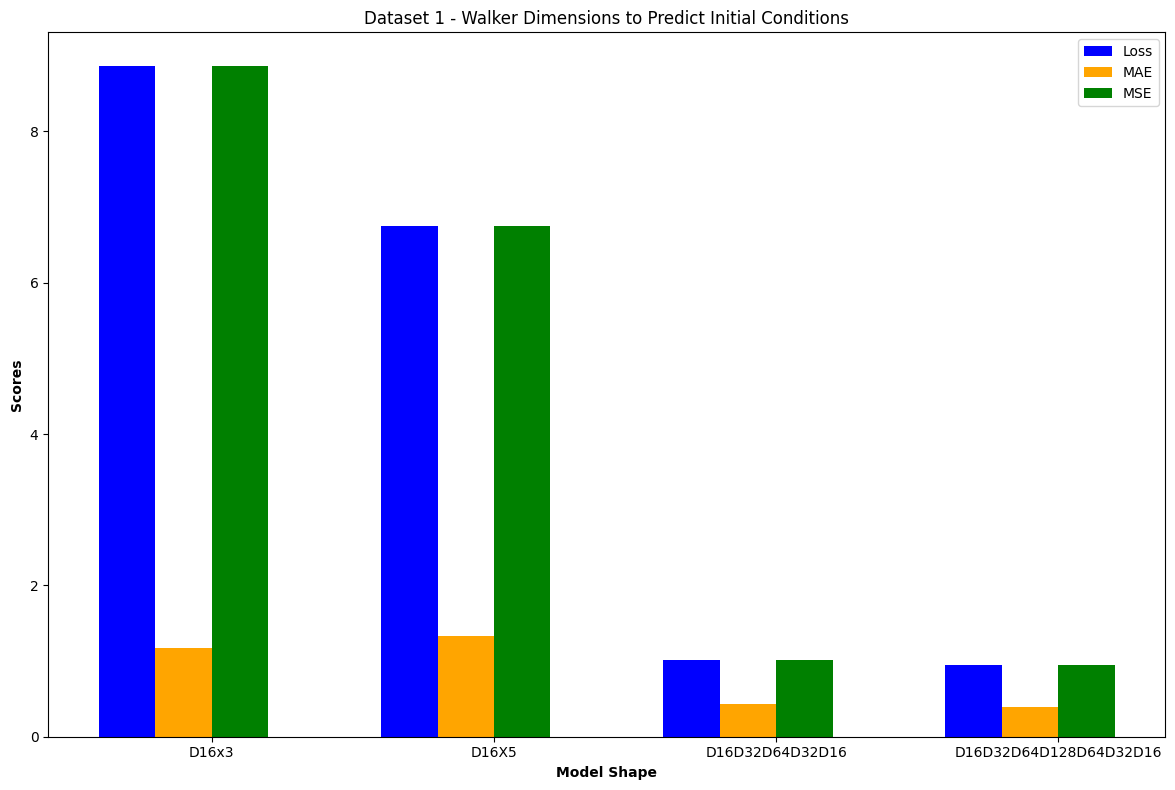

In [15]:
data = pd.read_csv("dataTable.csv")
X = data[['M', 'm', 'c', 'g', 'gamma']]
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

trainNNSeries(X, y, "Dataset 1 - Walker Dimensions to Predict Initial Conditions")

Train 4 NN models to use Dataset 1 and predict Stability using Initial Conditions

Epoch 1/10
6306/6306 [==============================] - 18s 3ms/step - loss: 0.0468 - mae: 0.0947 - mse: 0.0468 - val_loss: 0.0402 - val_mae: 0.0857 - val_mse: 0.0402
Epoch 2/10
6306/6306 [==============================] - 17s 3ms/step - loss: 0.0413 - mae: 0.0834 - mse: 0.0413 - val_loss: 0.0375 - val_mae: 0.0768 - val_mse: 0.0375
Epoch 3/10
6306/6306 [==============================] - 18s 3ms/step - loss: 0.0389 - mae: 0.0787 - mse: 0.0389 - val_loss: 0.0359 - val_mae: 0.0805 - val_mse: 0.0359
Epoch 4/10
6306/6306 [==============================] - 17s 3ms/step - loss: 0.0377 - mae: 0.0765 - mse: 0.0377 - val_loss: 0.0345 - val_mae: 0.0725 - val_mse: 0.0345
Epoch 5/10
6306/6306 [==============================] - 18s 3ms/step - loss: 0.0372 - mae: 0.0752 - mse: 0.0372 - val_loss: 0.0348 - val_mae: 0.0684 - val_mse: 0.0348
Epoch 6/10
6306/6306 [==============================] - 17s 3ms/step - loss: 0.0368 - mae: 0.0744 - mse: 0.0368 - val_loss: 0.0337 - val_mae: 0.0694 - val_mse: 0.033

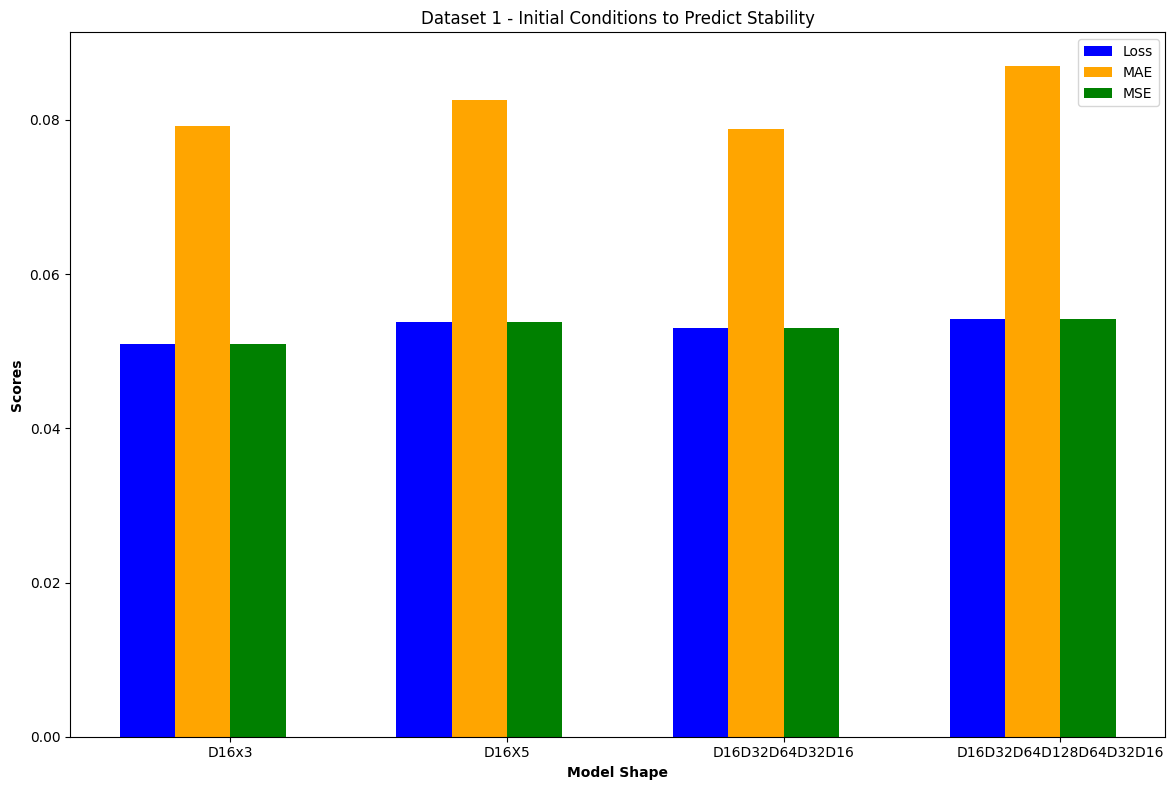

In [16]:
X = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]
y = data[['stable']]

trainNNSeries(X, y, "Dataset 1 - Initial Conditions to Predict Stability")

Train 4 NN models to use Dataset 2 and predict Initial Conditions using Walker Dimensions

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.3813 - mae: 0.3893 - mse: 0.3813 - val_loss: 0.3488 - val_mae: 0.3224 - val_mse: 0.3488
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3533 - mae: 0.3384 - mse: 0.3533 - val_loss: 0.3416 - val_mae: 0.3014 - val_mse: 0.3416
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3478 - mae: 0.3275 - mse: 0.3478 - val_loss: 0.3383 - val_mae: 0.2937 - val_mse: 0.3383
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3450 - mae: 0.3236 - mse: 0.3450 - val_loss: 0.3357 - val_mae: 0.2935 - val_mse: 0.3357
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3418 - mae: 0.3199 - mse: 0.3418 - val_loss: 0.3321 - val_mae: 0.2898 - val_mse: 0.3321
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3373 - mae: 0.3171 - mse: 0.3373 - val_loss: 0.3279 - val_mae: 0.2836 - val_mse: 0.3279
Epoch 7/10
100/1

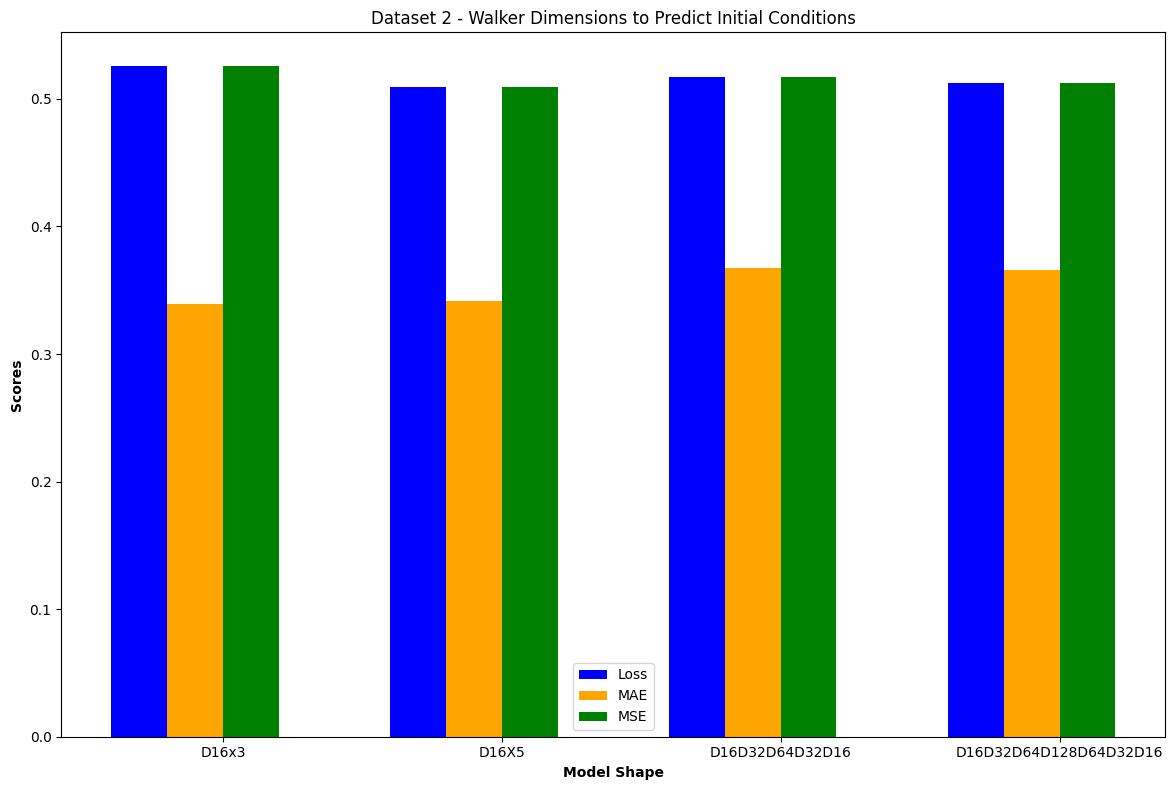

In [17]:
data = pd.read_csv("n10000 gamma0-0.2.csv")
X = data[['M', 'm', 'l', 'c', 'g', 'gamma']]
y = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]

trainNNSeries(X, y, "Dataset 2 - Walker Dimensions to Predict Initial Conditions")

Train 4 NN models to use Dataset 2 and predict Stability using Initial Conditions

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.2015 - mae: 0.3263 - mse: 0.2015 - val_loss: 0.1297 - val_mae: 0.2883 - val_mse: 0.1297
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.1328 - mae: 0.2858 - mse: 0.1328 - val_loss: 0.0931 - val_mae: 0.2388 - val_mse: 0.0931
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.1014 - mae: 0.2402 - mse: 0.1014 - val_loss: 0.0666 - val_mae: 0.1937 - val_mse: 0.0666
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0823 - mae: 0.2048 - mse: 0.0823 - val_loss: 0.0489 - val_mae: 0.1556 - val_mse: 0.0489
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.0673 - mae: 0.1752 - mse: 0.0673 - val_loss: 0.0377 - val_mae: 0.1291 - val_mse: 0.0377
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.0593 - mae: 0.1572 - mse: 0.0593 - val_loss: 0.0332 - val_mae: 0.1119 - val_mse: 0.0332
Epoch 7/10
100/1

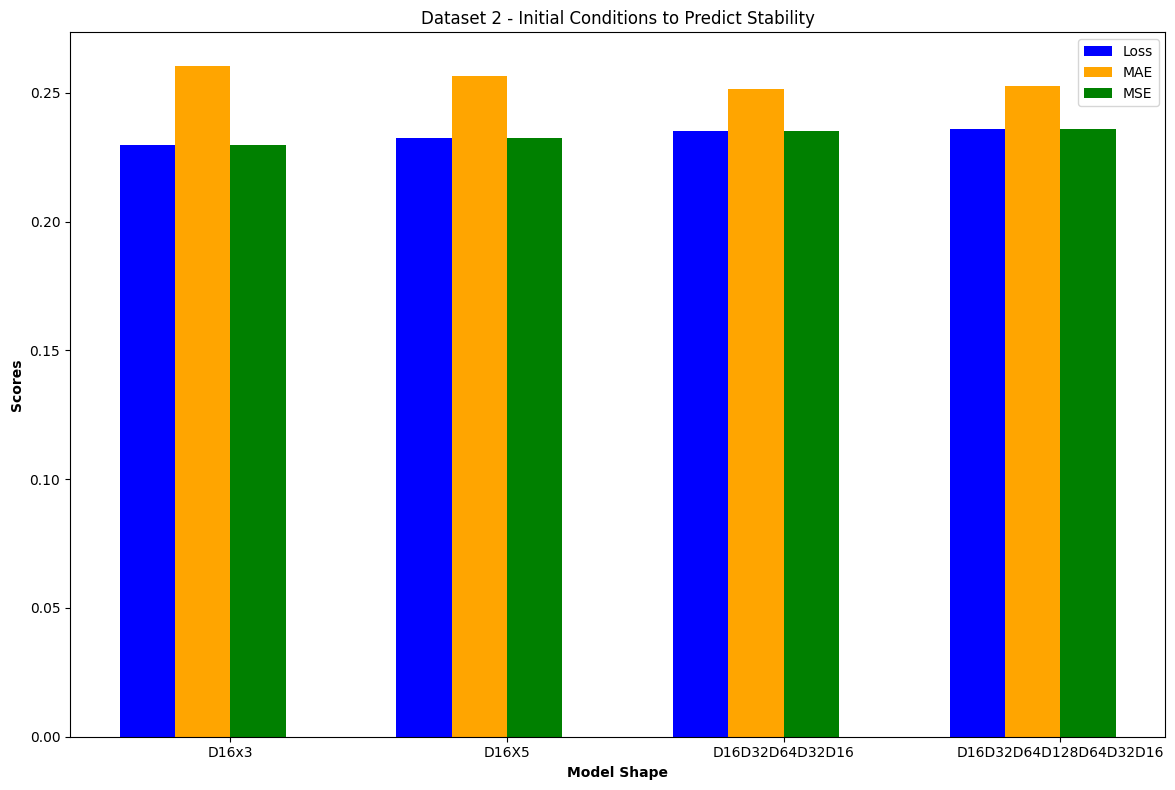

In [18]:
X = data[['qstar_1', 'qstar_2', 'qstar_3', 'qstar_4']]
y = data[['stable']]

trainNNSeries(X, y, "Dataset 2 - Initial Conditions to Predict Stability")